# Project Name: Mental Health IT Professional

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.
# Content
This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.subplots as sp

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/GNCIPL_AI_ML/survey.csv"

Mounted at /content/drive


In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.shape

(1259, 27)

In [6]:
#Dataset Columns
print("Columns Present in the Loan Dataset is: \n")
print(df.columns)

print("\n Data types of the columns of the dataset : ")
print(df.dtypes)


Columns Present in the Loan Dataset is: 

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

 Data types of the columns of the dataset : 
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_compa

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
# check null values
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


#  Outcome :
Missing values are present in the dataset columns — comments, work_interfere, self_employed, and state.

In [9]:
# Handle missing values - The dataset columns is categorical columns so we used mode to handle missing values  and we drop the comments columns beacuse it has more missing values
# Drop the 'comments' column
df = df.drop('comments', axis=1)

# Impute missing values in 'state' with the mode
df['state'] = df['state'].fillna(df['state'].mode()[0])

# Impute missing values in 'self_employed' with the mode
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

# Impute missing values in 'work_interfere' with the mode
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

# Verify that missing values have been handled
print(df.isnull().sum())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


## Data wrangling: handling duplicates


Check for duplicates and  handle duplicate rows.



Check for and remove duplicate rows in the DataFrame.



In [10]:
print("Number of duplicate rows before removal :" ,df.duplicated().sum())

Number of duplicate rows before removal : 0


In [11]:
print("Number of duplicate rows after removal :" ,df.duplicated().sum())

Number of duplicate rows after removal : 0


In [12]:
# Categorical columns (object or string type)
categorical_cols = df.select_dtypes(include='object').columns

# Numerical columns (int or float type)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Display results
print("Categorical Columns:")
print(categorical_cols.tolist())
print("\nTotal:", len(categorical_cols))

print("\n Numerical Columns:")
print(numerical_cols.tolist())
print("\nTotal:", len(numerical_cols))

Categorical Columns:
['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

Total: 25

 Numerical Columns:
['Age']

Total: 1


## Data cleaning: fixing inconsistent entries

Identify and fix inconsistent data entries in categorical columns.


In [13]:
# display categorical columns count
print("\nTotal number of categorical columns:", len(categorical_cols))
print("-" * 30)

for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)


Total number of categorical columns: 25
------------------------------
Column: Timestamp
Timestamp
2014-08-27 12:31:41    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
2014-08-27 12:54:11    2
2014-08-27 15:55:07    2
                      ..
2014-08-27 15:34:31    1
2014-08-27 15:34:23    1
2014-08-27 15:32:43    1
2014-08-27 15:32:19    1
2014-08-27 15:36:41    1
Name: count, Length: 1246, dtype: int64
------------------------------
Column: Gender
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                          

# Outcome :
Based on the value counts, the 'Gender' column has many inconsistent entries.  We need to clean and standardize it into a few common categories like Male, Female, and Other.



In [14]:
df['Gender'].value_counts()

,count
Gender,
Male,615
male,206
Female,121
M,116
female,62
F,38
m,34
f,15
Make,4


In [15]:
# Clean the 'Gender' column
df['Gender'] = df['Gender'].str.lower()

gender_map = {
    'male': 'Male',
    'm': 'Male',
    'female': 'Female',
    'f': 'Female',
    'cis male': 'Male',
    'man': 'Male',
    'cis female': 'Female',
    'woman': 'Female',
    'mal': 'Male',
    'male ': 'Male',
    'femake': 'Female',
    'make': 'Male',
    'guy (-ish) ^_^': 'Male',
    'cis-female/femme': 'Female',
    'msle': 'Male',
    'neuter': 'Other',
    'queer': 'Other',
    'female (cis)': 'Female',
    'mail': 'Male',
    'cis man': 'Male',
    'something kinda male?': 'Male',
    'maile': 'Male',
    'queer/she/they': 'Other',
    'enby': 'Other',
    'fluid': 'Other',
    'genderqueer': 'Other',
    'androgyne': 'Other',
    'agender': 'Other',
    'nah': 'Other',
    'all': 'Other',
    'non-binary': 'Other',
    'male leaning androgynous': 'Male',
    'trans woman': 'Female',
    'female (trans)': 'Female',
    'trans-female': 'Female',
    'male (cis)': 'Male',
    'a little about you': 'Other',
    'malr': 'Male',
    'p': 'Other',
    'femail': 'Female',
    'ostensibly male, unsure what that really means': 'Other',
    'male-ish': 'Male',
    'female-ish': 'Female',
}


df['Gender'] = df['Gender'].replace(gender_map)

# Verify the unique values and counts after cleaning
print("Column: Gender after cleaning")
print(df['Gender'].value_counts())

Column: Gender after cleaning
Gender
Male       994
Female     249
Other       14
female       2
Name: count, dtype: int64



There are still 2 'female' entries in the 'Gender' column that need to be standardized to 'Female'. After this final cleaning, the 'Gender' column should be consistent. The other categorical columns examined so far appear to have consistent entries.



In [16]:
# cleaning step for the 'Gender' column
df['Gender'] = df['Gender'].replace('female', 'Female')

# Verify the unique values and counts after final cleaning
print("Column: Gender after final cleaning")
print(df['Gender'].value_counts())
print("-" * 30)



Column: Gender after final cleaning
Gender
Male       994
Female     249
Other       14
female       2
Name: count, dtype: int64
------------------------------



There are still 2 'female' entries in the 'Gender' column. Perform the final cleaning to standardize these entries to 'Female'.



**Reasoning**:
The previous cleaning attempts for the 'Gender' column did not completely remove the 'female' entry. Perform one more replace to ensure only 'Male', 'Female', and 'Other' remain.


In [17]:
# Create a dictionary to map existing categories to cleaned categories
gender_clean_map = {
    'Male': 'Male',
    'Female': 'Female',
    'Other': 'Other',
    'female': 'Female'
}

# Apply the mapping to the 'Gender' column
df['Gender'] = df['Gender'].map(gender_clean_map)

# Verify the unique values and counts after final cleaning
print("Column: Gender after final cleaning using map")
print(df['Gender'].value_counts())
print("-" * 30)

Column: Gender after final cleaning using map
Gender
Male      994
Female    249
Other      14
Name: count, dtype: int64
------------------------------



Identify and fix inconsistent data entries in categorical columns.


In [18]:
categorical_cols

Index(['Timestamp', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [19]:
# Check remaining categorical columns for inconsistencies (based on the original list)
categorical_cols_remaining = ['mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                              'mental_vs_physical', 'obs_consequence']

for col in categorical_cols_remaining:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: mental_health_consequence
mental_health_consequence
No       490
Maybe    477
Yes      292
Name: count, dtype: int64
------------------------------
Column: phys_health_consequence
phys_health_consequence
No       925
Maybe    273
Yes       61
Name: count, dtype: int64
------------------------------
Column: coworkers
coworkers
Some of them    774
No              260
Yes             225
Name: count, dtype: int64
------------------------------
Column: supervisor
supervisor
Yes             516
No              393
Some of them    350
Name: count, dtype: int64
------------------------------
Column: mental_health_interview
mental_health_interview
No       1008
Maybe     207
Yes        44
Name: count, dtype: int64
------------------------------
Column: phys_health_interview
phys_health_interview
Maybe    557
No       500
Yes      202
Name: count, dtype: int64
------------------------------
Column: mental_vs_physical
mental_vs_physical
Don't know    576
Yes           343
No            3

In [20]:
# Check remaining categorical columns for inconsistencies
categorical_cols_remaining_check = ['Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work',
                                    'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave' ]

for col in categorical_cols_remaining_check:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Column: Country
Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay         

In [21]:
df['no_employees'].value_counts()

,count
no_employees,
6-25,290
26-100,289
More than 1000,282
100-500,176
1-5,162
500-1000,60


No. of employees

In [22]:
# Clean invalid values
valid_categories = [
    '1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'
]

# Replace unexpected entries like 'Jun-25', '01-May', etc.
df['no_employees'] = df['no_employees'].apply(lambda x: x if x in valid_categories else None)

# Optionally, fill None with 'Unknown'
df['no_employees'] = df['no_employees'].fillna('Unknown')

# Check unique values after cleaning
print(df['no_employees'].value_counts())


no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64


## Data preprocessing: outlier detection and treat
Detect and treat outliers in numerical columns.


**Reasoning**:
Identify the numerical columns and visualize their distributions using box plots to detect outliers.



Numerical columns:  Index(['Age'], dtype='object')


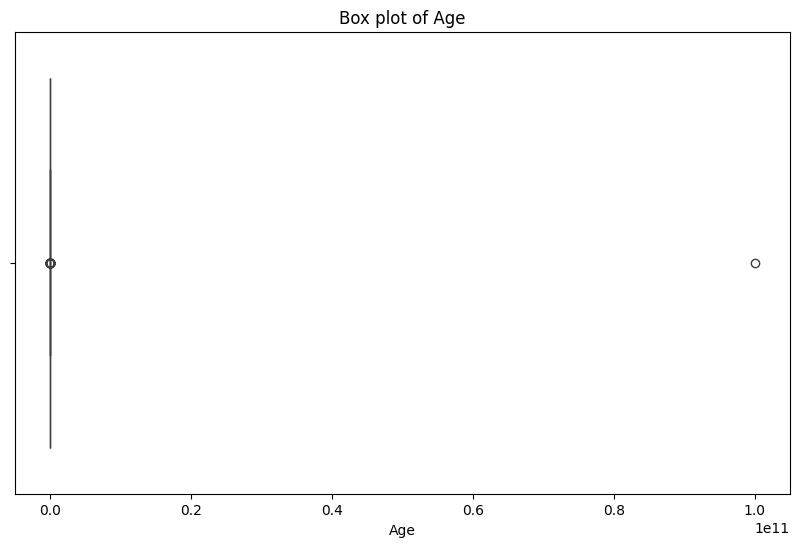

In [23]:
print("Numerical columns: ",numerical_cols)

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

**Reasoning**:
Based on the box plot of the 'Age' column, there are outliers present. I will define a function to cap the outliers using the IQR method and then apply this function to the 'Age' column. After capping, I will display the box plot again to verify the treatment.



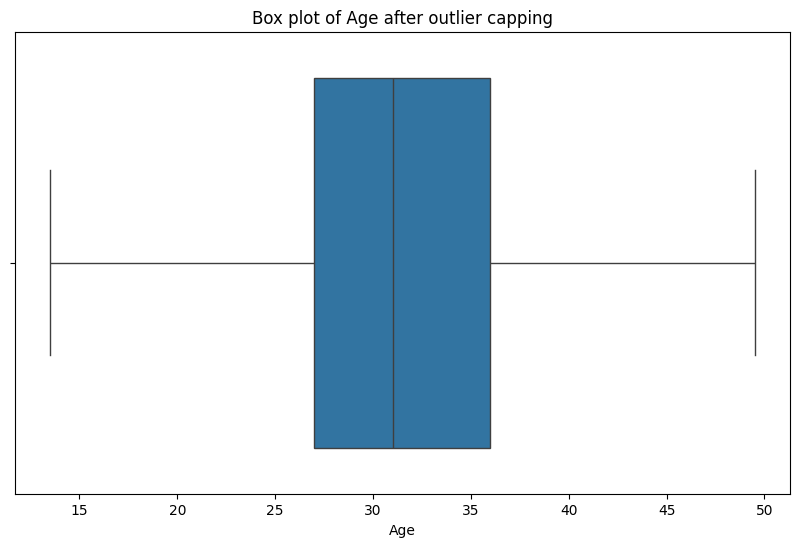

In [24]:
def cap_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df = cap_outliers_iqr(df, 'Age')

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Box plot of Age after outlier capping')
plt.show()

## data type conversion


Convert data types where necessary (e.g., converting 'Timestamp' to datetime objects).



Convert the 'Timestamp' column to datetime objects and then print its data type.



In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df['Timestamp'].dtype)

datetime64[ns]


In [26]:
df['Timestamp'].head()

,Timestamp
0,2014-08-27 11:29:31
1,2014-08-27 11:29:37
2,2014-08-27 11:29:44
3,2014-08-27 11:29:46
4,2014-08-27 11:30:22


## Feature engineering





Perform Feature engineering on timestamp cloumns to extract year, month, and day from the 'Timestamp' column and create 'Age_Group' and 'Is_USA' features, then display the head of the dataframe to show the new features.



In [27]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year, Month, and Day
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day



In [28]:
# Create Age_Group manually
def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 35:
        return 'Adult'
    elif 35 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Older'

df['Age_Group'] = df['Age'].apply(age_group)
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Age_Group
0,2014-08-27 11:29:31,37.0,Female,United States,IL,No,No,Yes,Often,6-25,...,Some of them,Yes,No,Maybe,Yes,No,2014,8,27,Middle-aged
1,2014-08-27 11:29:37,44.0,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,Don't know,No,2014,8,27,Middle-aged
2,2014-08-27 11:29:44,32.0,Male,Canada,CA,No,No,No,Rarely,6-25,...,Yes,Yes,Yes,Yes,No,No,2014,8,27,Adult
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,CA,No,Yes,Yes,Often,26-100,...,Some of them,No,Maybe,Maybe,No,Yes,2014,8,27,Adult
4,2014-08-27 11:30:22,31.0,Male,United States,TX,No,No,No,Never,100-500,...,Some of them,Yes,Yes,Yes,Don't know,No,2014,8,27,Adult


In [29]:

# Create a new feature 'Is_USA'
df['Is_USA'] = df['Country'].apply(lambda x: 'Yes' if x == 'United States' else 'No')

# Display first few rows to verify new features
print(" Feature Engineering Completed :")
display(df.head())


 Feature Engineering Completed :


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Age_Group,Is_USA
0,2014-08-27 11:29:31,37.0,Female,United States,IL,No,No,Yes,Often,6-25,...,Yes,No,Maybe,Yes,No,2014,8,27,Middle-aged,Yes
1,2014-08-27 11:29:37,44.0,Male,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,Don't know,No,2014,8,27,Middle-aged,Yes
2,2014-08-27 11:29:44,32.0,Male,Canada,CA,No,No,No,Rarely,6-25,...,Yes,Yes,Yes,No,No,2014,8,27,Adult,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,CA,No,Yes,Yes,Often,26-100,...,No,Maybe,Maybe,No,Yes,2014,8,27,Adult,No
4,2014-08-27 11:30:22,31.0,Male,United States,TX,No,No,No,Never,100-500,...,Yes,Yes,Yes,Don't know,No,2014,8,27,Adult,Yes


In [30]:
# Replace infinite values with NaN in 'Age' column to avoid plotting errors
df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)

# Fill missing values in 'Age' with median value (assign back, avoid inplace warning)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [31]:
df.shape

(1259, 31)

## Exploratory data analysis (eda): univariate analysis


Analyze the distribution of individual features using appropriate visualizations (histograms, box plots, etc.).


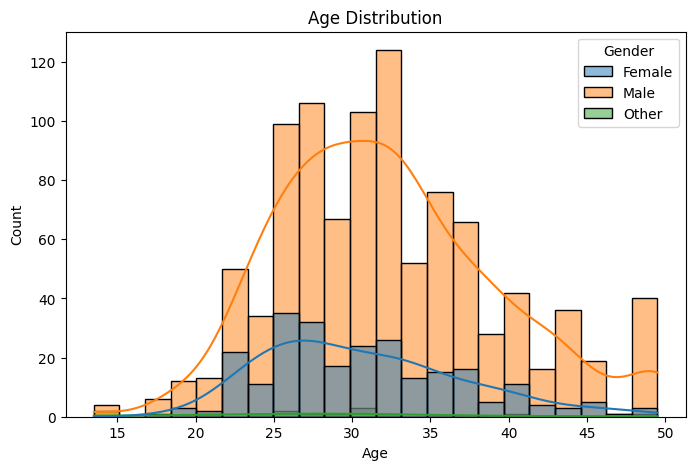

In [32]:
# 1. Age distribution with KDE (kernel density estimation)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, hue='Gender')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#

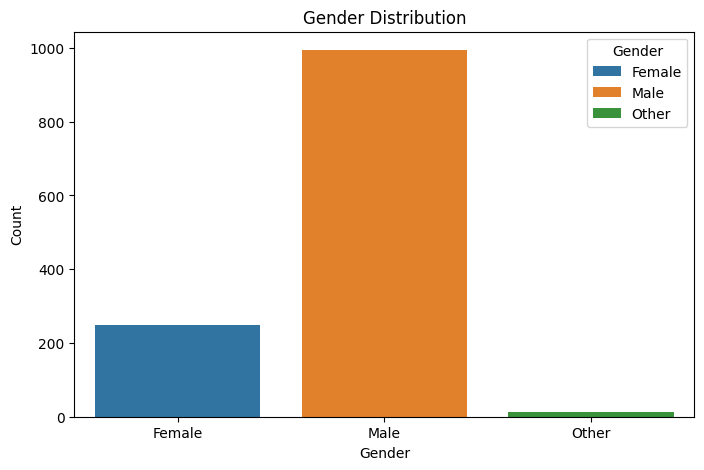

In [33]:
# Gender bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, hue='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [34]:
# Top 10 countries
top_countries = df['Country'].value_counts().head(10).index
top_countries

Index(['United States', 'United Kingdom', 'Canada', 'Germany', 'Netherlands',
       'Ireland', 'Australia', 'France', 'India', 'New Zealand'],
      dtype='object', name='Country')

In [35]:
top_countries = df['Country'].value_counts().head(10).index
px.pie(df[df['Country'].isin(top_countries)], names='Country', title='Top 10 Countries')

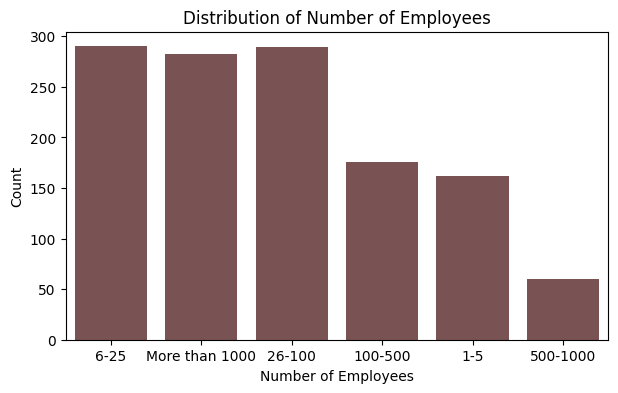

In [36]:
# bar chart of no. of employees
plt.figure  (figsize=(7, 4))
sns.countplot(x='no_employees', data=df, color=(0.5, 0.3, 0.3)) # Another example RGB color
plt.title("Distribution of Number of Employees")
plt.xlabel("Number of Employees")
plt.ylabel("Count")
plt.show()

In [37]:
#Work Interference - Distribution
# ------------------------------------------------------------
fig = px.pie(df, names='work_interfere', title='How Mental Health Interferes with Work',
             color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

# Bivariate Analysis

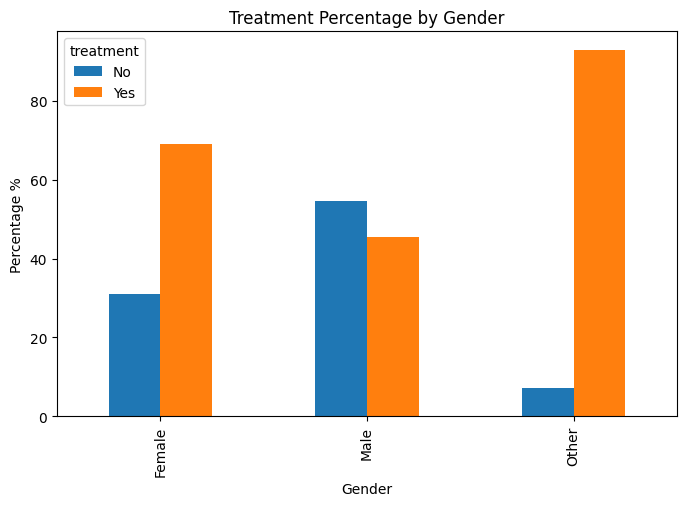

In [38]:
treat_gender = pd.crosstab(df['Gender'], df['treatment'], normalize='index') * 100
treat_gender.plot(kind='bar', figsize=(8,5))
plt.title("Treatment Percentage by Gender")
plt.ylabel("Percentage %")
plt.show()


In [39]:

# Compare treatment rates with family history.
# ------------------------------------------------------------
px.histogram(df, x='family_history', color='treatment', barmode='group',
             title='Treatment vs Family History').show()

In [40]:

fig = px.bar(df, x='Age_Group', color='treatment',
             title='Treatment by Age Group',
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [41]:
#Remote Work vs Mental Health Treatment (Bivariate)
# ------------------------------------------------------------
fig = px.histogram(df, x='remote_work', color='treatment',
                   title='Remote Work vs Mental Health Treatment',
                   barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

In [42]:
# benefites vs care options
px.bar(df, x='benefits', color='care_options', barmode='group',
       title='Benefits vs Care Options').show()

In [43]:
# Mental Health vs Physical Health Awareness (Bivariate)
# ------------------------------------------------------------
fig = px.bar(df, x='mental_vs_physical', color='tech_company',
             title=' Mental Health vs physical Awarness',
             barmode='group',
             color_discrete_sequence=px.colors.qualitative.D3)
fig.show()

In [44]:
top_countries = df['Country'].value_counts().head(10).index
fig = px.histogram(df[df['Country'].isin(top_countries)],
                   x='Country',
                   color='mental_health_consequence',
                   barmode='group',
                   title='Mental Health Consequences by Country')
fig.show()

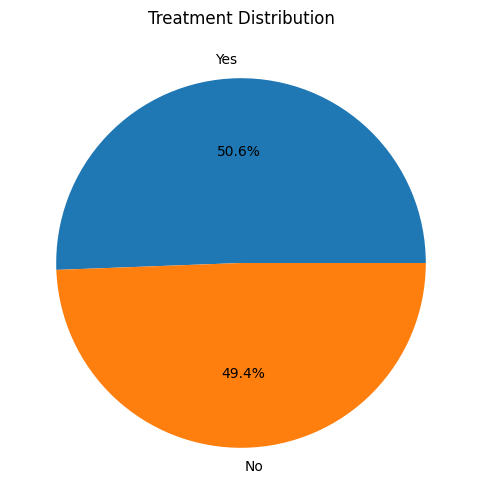

In [45]:
plt.figure(figsize=(6,6))
df['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Treatment Distribution")
plt.ylabel('')
plt.show()


# Multivariate Analysis

In [46]:
#Pairwise Relationship (Multivariate)
# ------------------------------------------------------------
fig = px.bar(df, x='Age', y='Year', color='treatment',
                 title='Age vs Year Colored by Treatment',
                 color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

In [47]:
px.sunburst(df, path=['Country', 'tech_company', 'treatment'],
            title='Country → Tech Company → Treatment').show()


The sunburst chart you just generated, titled 'Country → Tech Company → Treatment', visualizes a hierarchical relationship between three categorical variables: 'Country', 'tech_company', and 'treatment'.

Here's how to interpret its hierarchy:

Outermost Ring: Country

Each segment in the outermost ring represents a Country from your dataset. The size of the segment indicates the proportion of respondents from that country.
Middle Ring: Tech Company

Moving inward, the next ring breaks down each Country segment into tech_company categories ('Yes' or 'No'). This shows, for each country, how many respondents work for a tech company versus a non-tech company.
Innermost Ring: Treatment

Finally, the innermost ring further subdivides each tech_company segment by the treatment variable ('Yes' or 'No'). This reveals, within each country and tech company type, the proportion of respondents who sought mental health treatment.


In [48]:
# Treemap: Employees → Benefits → Treatment
px.treemap(df, path=['no_employees', 'benefits', 'treatment'],
           title='Company Size → Benefits → Treatment').show()

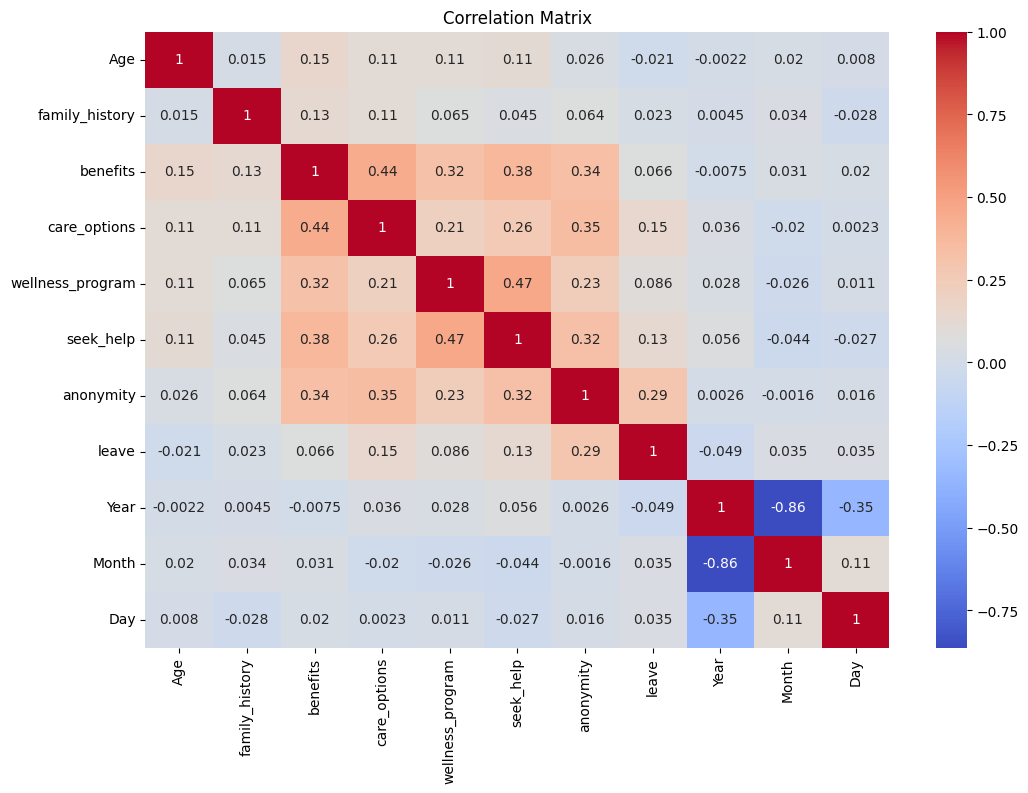

In [49]:
#Multivariate Analysis
encode_candidates = [
    'gender', 'family_history', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'anonymity', 'leave'
]
encodable = [col for col in encode_candidates if col in df.columns]

encoded = df.copy()
for col in encodable:
    encoded[col] = encoded[col].astype('category').cat.codes

correlation = encoded.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Hypothesis Testing

We will perform several hypothesis tests to explore relationships between key variables in the dataset. We'll use a significance level (alpha) of 0.05.

**Null Hypothesis ($H_0$)**: There is no significant relationship between the variables.

**Alternative Hypothesis ($H_1$)**: There is a significant relationship between the variables.

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import numpy as np

# Define significance level
alpha = 0.05

# List to store results
results = []

print(f"Significance Level (alpha): {alpha}")

Significance Level (alpha): 0.05


In [51]:
#T-TEST : Age vs Treatment
# ------------------------------
print("\n🔹 T-TEST : Age vs Treatment")
print("H0 (Null): Mean age of people taking treatment = mean age of people not taking treatment")
print("H1 (Alternate): Mean ages are different")

# Convert treatment column to numeric (1 = Yes, 0 = No)
df['treatment_flag'] = df['treatment'].astype(str).str.lower().map({'yes': 1, 'no': 0})
df = df.dropna(subset=['Age', 'treatment_flag'])

group_yes = df[df['treatment_flag'] == 1]['Age']
group_no  = df[df['treatment_flag'] == 0]['Age']

t_stat, p_val = ttest_ind(group_yes, group_no, equal_var=False)
print(f"T-Statistic = {t_stat:.3f}")
print(f"P-Value = {p_val:.4f}")

if p_val < 0.05:
    print(" Result: Reject H0 → Mean age differs significantly.")
else:
    print(" Result: Fail to reject H0 → No significant difference in mean age.")




🔹 T-TEST : Age vs Treatment
H0 (Null): Mean age of people taking treatment = mean age of people not taking treatment
H1 (Alternate): Mean ages are different
T-Statistic = 2.632
P-Value = 0.0086
 Result: Reject H0 → Mean age differs significantly.


### Chi-Squared Tests for Independence

We will test if there is a statistically significant association between various categorical features and the `treatment` variable (our target variable).

In [52]:
# -------------------------------------------------------
# 2️⃣  CHI-SQUARE TEST : Self Employed vs Family History
# -------------------------------------------------------
print("\n🔹 CHI-SQUARE TEST : Self Employed vs Family History")
print("H0 (Null): Self employment and family history are independent")
print("H1 (Alternate): They are dependent")

# Build contingency table
contingency = pd.crosstab(df['self_employed'], df['family_history'])
print("\nContingency Table:")
print(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-Square Statistic = {chi2:.3f}")
print(f"P-Value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")

if p < 0.05:
    print(" Result: Reject H0 → Variables are dependent.")
else:
    print(" Result: Fail to reject H0 → Variables are independent.")


🔹 CHI-SQUARE TEST : Self Employed vs Family History
H0 (Null): Self employment and family history are independent
H1 (Alternate): They are dependent

Contingency Table:
family_history   No  Yes
self_employed           
No              680  433
Yes              87   59

Chi-Square Statistic = 0.068
P-Value = 0.7943
Degrees of Freedom = 1
 Result: Fail to reject H0 → Variables are independent.


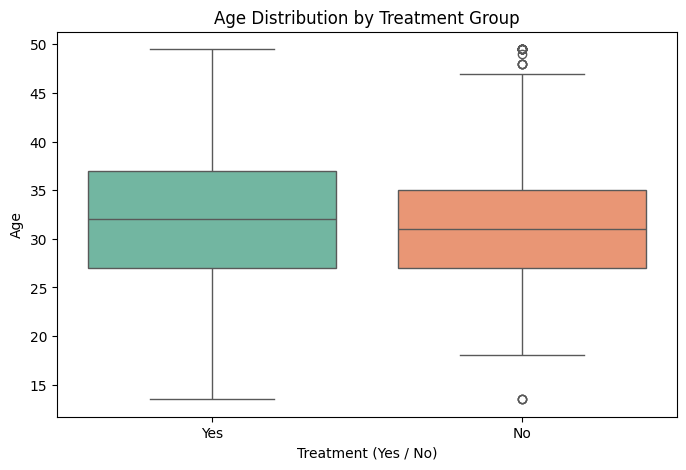

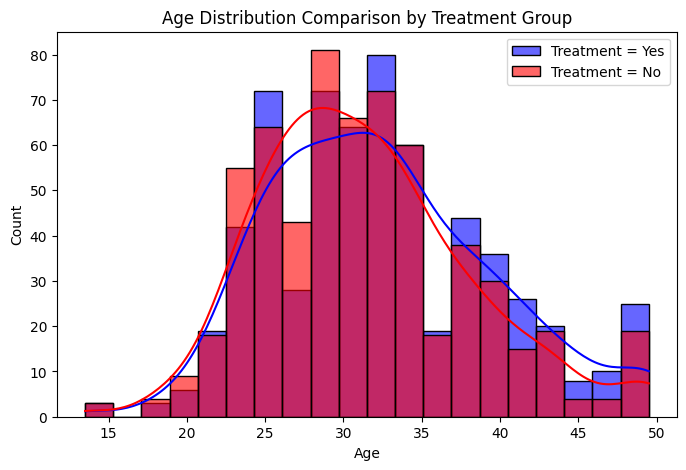

In [53]:
# Visualization for t-test: Age vs Treatment
plt.figure(figsize=(8,5))
sns.boxplot(x='treatment', y='Age', data=df, palette='Set2')
plt.title("Age Distribution by Treatment Group")
plt.xlabel("Treatment (Yes / No)")
plt.ylabel("Age")
plt.show()

# Histogram comparison
plt.figure(figsize=(8,5))
sns.histplot(df[df['treatment']=='Yes']['Age'], bins=20, color='blue', label='Treatment = Yes', kde=True, alpha=0.6)
sns.histplot(df[df['treatment']=='No']['Age'], bins=20, color='red', label='Treatment = No', kde=True, alpha=0.6)
plt.title("Age Distribution Comparison by Treatment Group")
plt.legend()
plt.show()

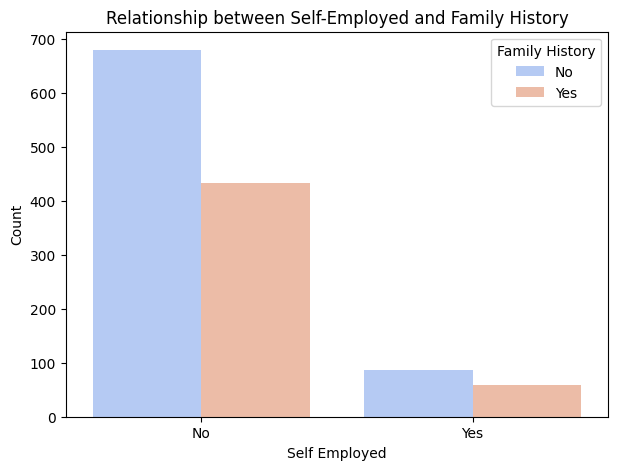

In [54]:
# Visualization for chi-square test: self_employed vs family_history
plt.figure(figsize=(7,5))
sns.countplot(x='self_employed', hue='family_history', data=df, palette='coolwarm')
plt.title("Relationship between Self-Employed and Family History")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.legend(title="Family History")
plt.show()
